# 2D OTF Development

For all types of OTFs and PSFs if we don't want to take into account vectorial effects we can calculate the 2D OTF or PSF _only_ and interpolate it out to a full 3D extent, if requested. This should offer huge speed gains by taking advantage of the symmetry of the problem.

We should also be able to make use of real valued fft's (`rfftn` and `irfftn`) to speed up the computation even further.

In [1]:
%pylab inline
from pyOTF.utils import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
x = linspace(-1,1,256)
xx, yy = meshgrid(x, x)
r = hypot(xx, yy)
coh_otf = logical_and(abs(r-0.5) < x[1]-x[0], yy > 0.3)

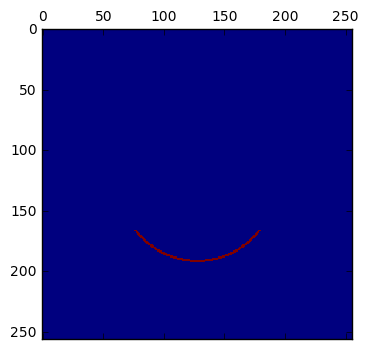

In [3]:
matshow(coh_otf)

In [4]:
coh_psf = easy_ifft(coh_otf)

In [5]:
iotf = easy_fft(abs(coh_psf) ** 2)

In [8]:
from dphplotting import slice_plot, mip

(<matplotlib.figure.Figure at 0x1c77315ec50>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C7736620F0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001C7737B9CC0>], dtype=object))

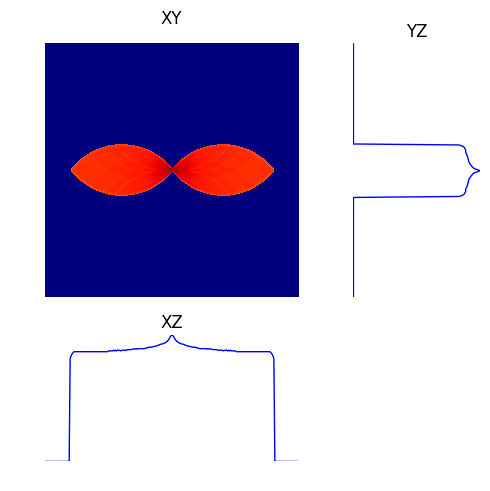

In [9]:
mip(log((iotf.real + np.finfo(iotf.dtype).resolution)))